In [1]:
import pandas as pd 
import joblib 

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'EMI']

In [5]:
df.head()

,age,gender,bmi,children,smoker,region,EMI
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   EMI       1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum()

1

In [8]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
EMI         0
dtype: int64

In [14]:
# find total no. of female that inhales smoking

filter_data = df[(df['gender']=='female') & (df['smoker']=='yes')&(df['region']=='northwest')]
filter_data.shape

(29, 7)

In [11]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
smoky = df[(df['gender']=='female') & (df['smoker']=='yes')]
smoky.head()

,age,gender,bmi,children,smoker,region,EMI
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


In [16]:
smoky['region'].value_counts()

region
southeast    36
northeast    29
northwest    29
southwest    21
Name: count, dtype: int64

In [18]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [21]:
import seaborn as sns 
import matplotlib as  plt 

<Axes: xlabel='count', ylabel='gender'>

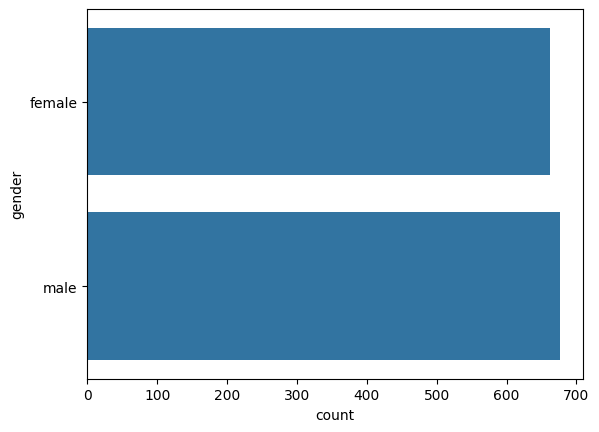

In [26]:
sns.countplot(df['gender'])


<Axes: xlabel='age', ylabel='EMI'>

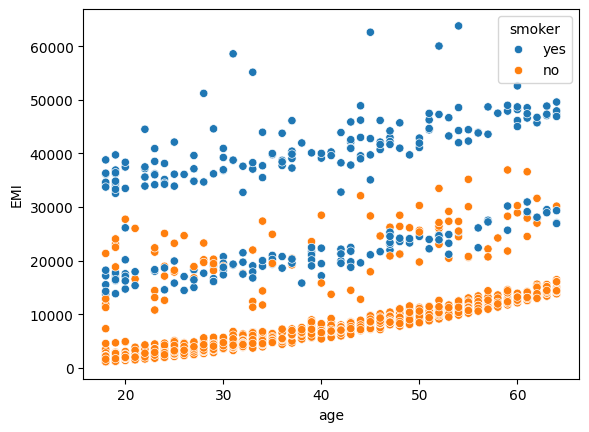

In [33]:
sns.scatterplot(x='age',y='EMI',data=df,hue='smoker')

In [39]:
df['gender'] = df['gender'].map({'male':1,'female':0})

In [42]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [46]:
cleaned_data = pd.get_dummies(df).astype(int)
cleaned_data.head() 

,age,gender,bmi,children,smoker,EMI,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


In [47]:
cleaned_data.to_csv('cleaned-insurance.csv',index=False)

In [55]:
x = cleaned_data.drop('EMI',axis=1)
y = cleaned_data[['EMI']]


In [50]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [52]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
print("Training score : ",lr.score(x_train,y_train))
print("Testing score : ",lr.score(x_test,y_test))


Training score :  0.7547913788792224
Testing score :  0.7093226189563078


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
rdf =  RandomForestRegressor()

In [63]:
rdf.fit(x_train,y_train)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [64]:
print("Training score : ",rdf.score(x_train,y_train))
print("Testing score : ",rdf.score(x_test,y_test))


Training score :  0.9777798923290636
Testing score :  0.7821358757478385


In [65]:
dt = DecisionTreeRegressor()

In [66]:
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [67]:
print("Training score : ",dt.score(x_train,y_train))
print("Testing score : ",dt.score(x_test,y_test))


Training score :  0.9986109836095716
Testing score :  0.6619511728637031


In [ ]:
RandomForestRegressor()

In [68]:
print(RandomForestRegressor.__doc__)


    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    For a comparison between tree-based ensemble models see the example
    :ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"squared_error", "absolute_error", "friedman_mse", "poisson"},             default="squared_error"
        The function 

In [ ]:
lst = [25,41,85,96,24]
lst.remove()

In [70]:
import joblib  

In [71]:
# joblib.dump(rdf,'model.lb') 
model = joblib.load('rfmodel.lb')


C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.4.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [75]:
single_unseen_data_point = [[33	,1	,22	,0	,0	,	0	,1	,0	,0]]


In [76]:
model.predict(single_unseen_data_point)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16820.54])

In [3]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [ ]:

rdf = RandomForestRegressor()

In [4]:
print(RandomForestRegressor.__doc__)


    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    For a comparison between tree-based ensemble models see the example
    :ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"squared_error", "absolute_error", "friedman_mse", "poisson"},             default="squared_error"
        The function 

#### HYPERPARAMETER TURNING 

In [5]:
rdf = RandomForestClassifier()

In [7]:
rdf.__dict__

{'estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0}

In [8]:
rdf2 = RandomForestRegressor(n_estimators=150,
min_samples_leaf=10,
min_samples_split=20)